<a href="https://colab.research.google.com/github/aleynahukmet/Adult-Incomes/blob/main/Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/winequality-red.csv")

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].value_counts() 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
# Calculate the correlation
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
#check the correlation between the quality to each of columns 
data.corr()["quality"]


fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

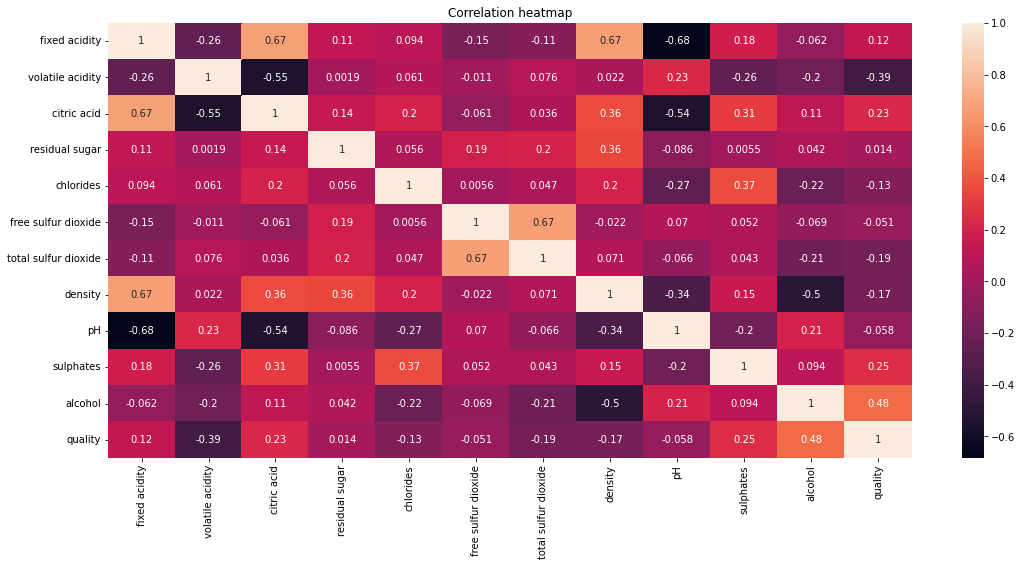

In [ ]:
#Graphically represent the correlation with heatmap
plt.figure(figsize = (18,8))
plt.title("Correlation heatmap")
sns.heatmap(data.corr(), annot=True)

Based on the heatmap above, we can see "residual sugar", 'free sulfur dioxide' and 'pH'does not have much of a relationship with “quality”.

In [ ]:
data.drop(["residual sugar","free sulfur dioxide","pH"],axis = 1, inplace = True)

In [ ]:
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


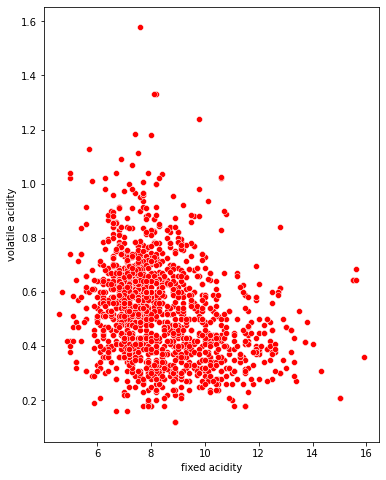

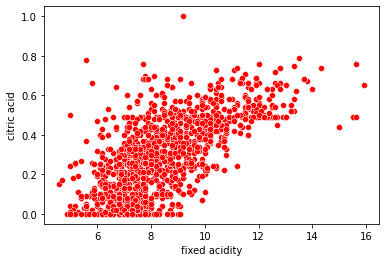

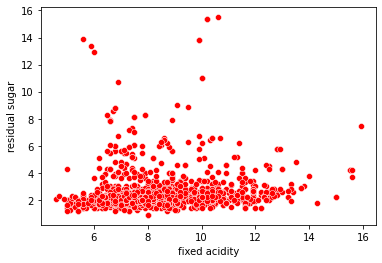

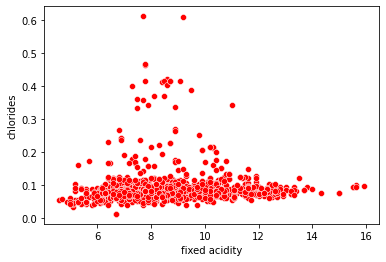

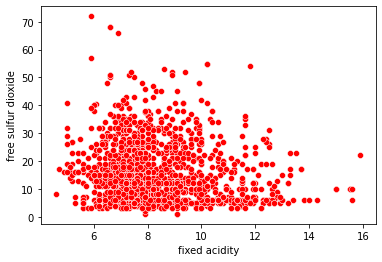

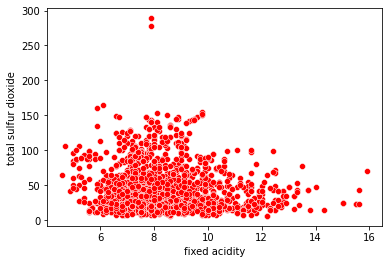

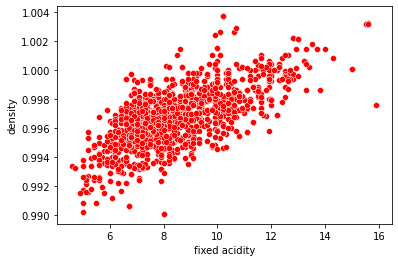

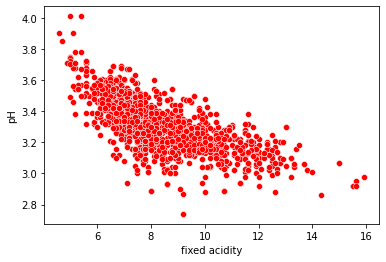

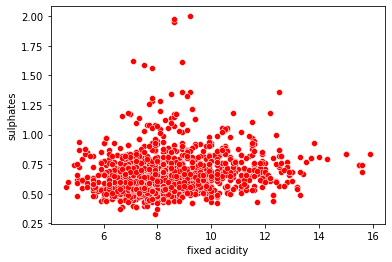

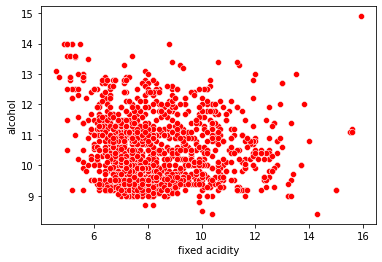

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[0]:
        sns.scatterplot(x = x.columns[0],y = i,data = x,color = 'Red')
        plt.show()

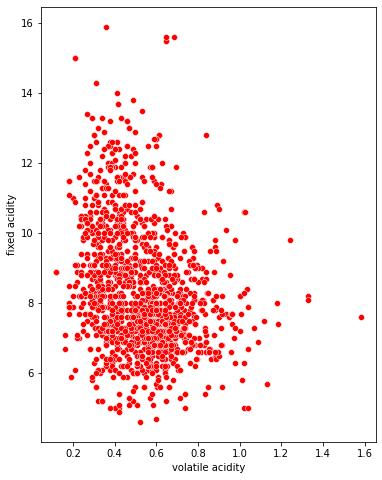

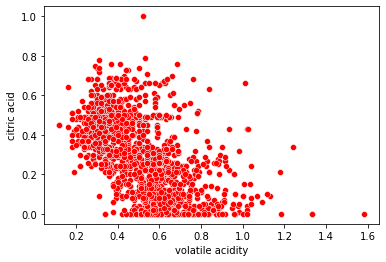

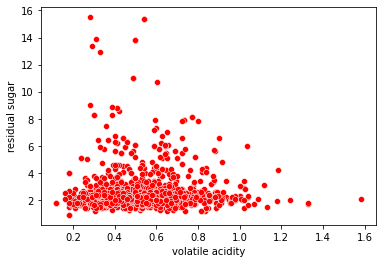

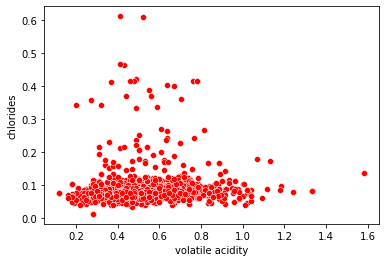

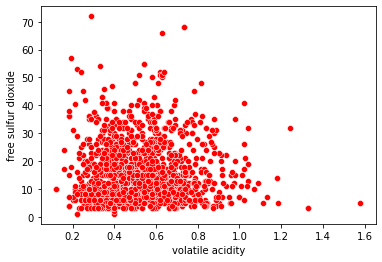

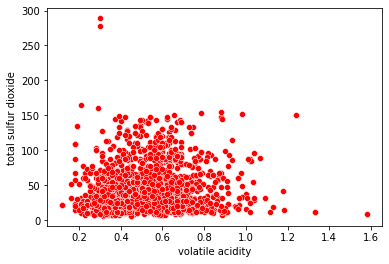

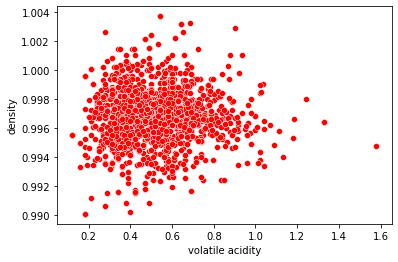

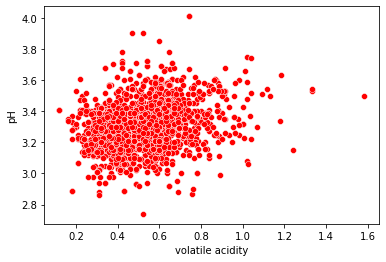

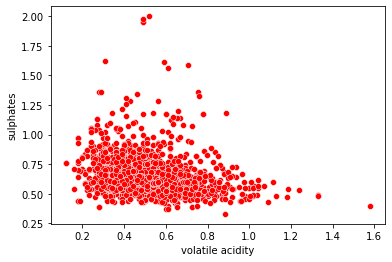

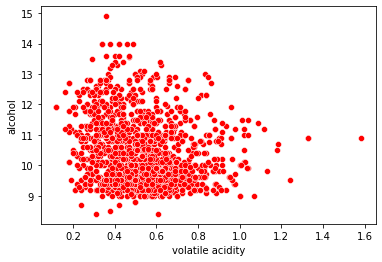

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[1]:
        sns.scatterplot(x = x.columns[1],y = i,data = x,color = 'Red')
        plt.show()

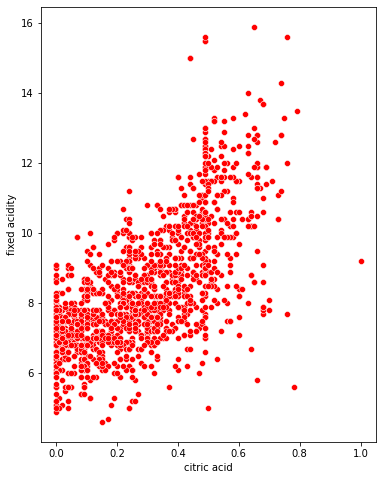

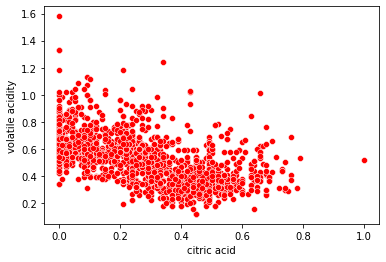

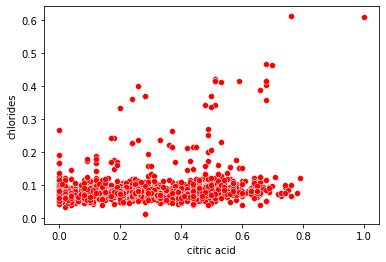

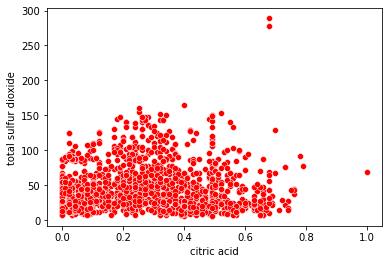

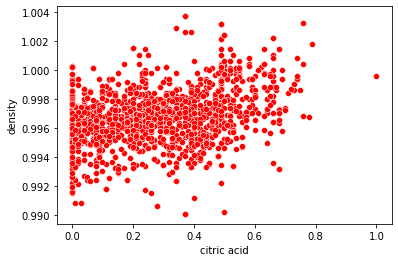

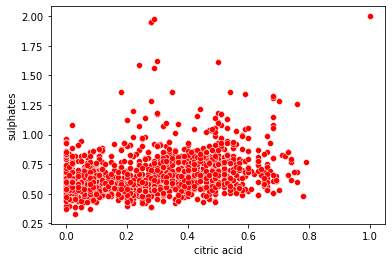

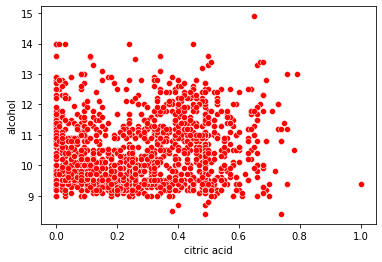

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[2]:
        sns.scatterplot(x = x.columns[2],y = i,data = x,color = 'Red')
        plt.show()

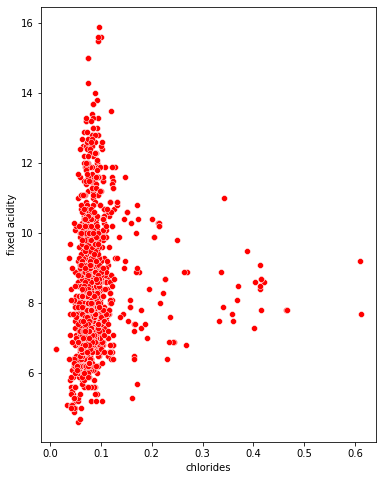

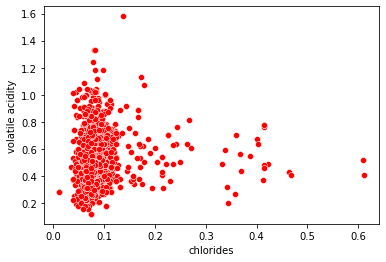

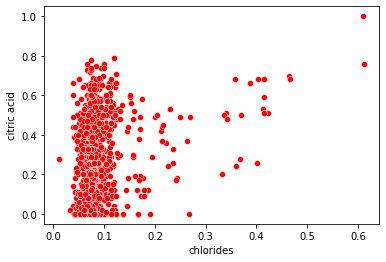

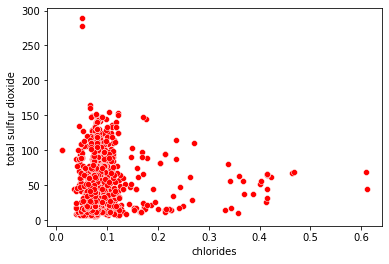

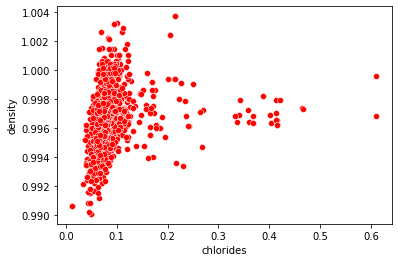

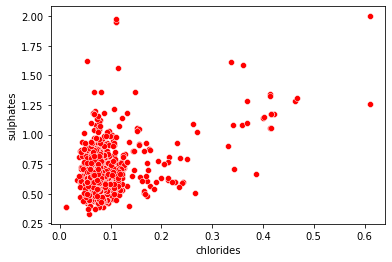

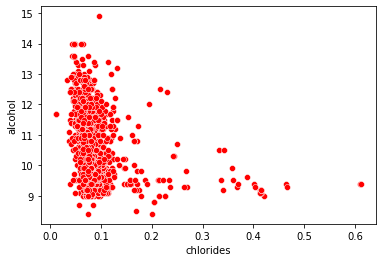

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[3]:
        sns.scatterplot(x = x.columns[3],y = i,data = x,color = 'Red')
        plt.show()

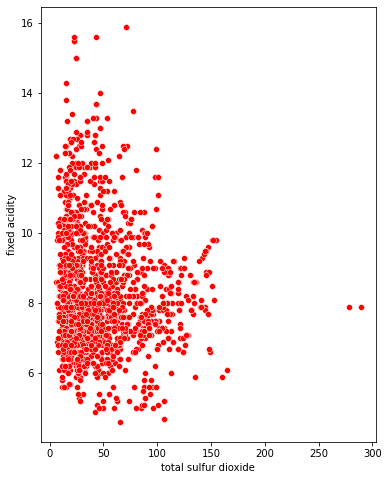

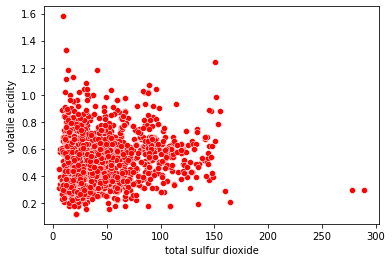

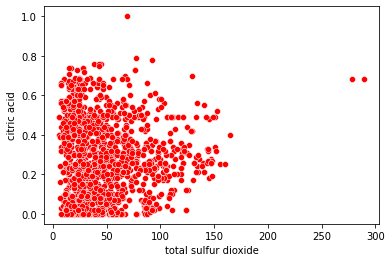

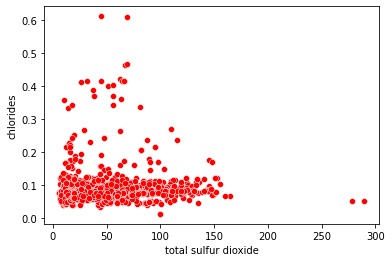

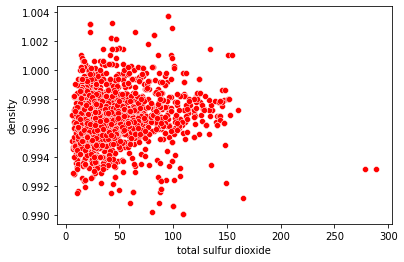

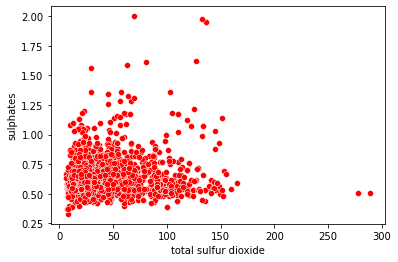

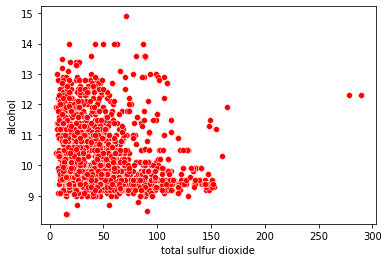

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[4]:
        sns.scatterplot(x = x.columns[4],y = i,data = x,color = 'Red')
        plt.show()

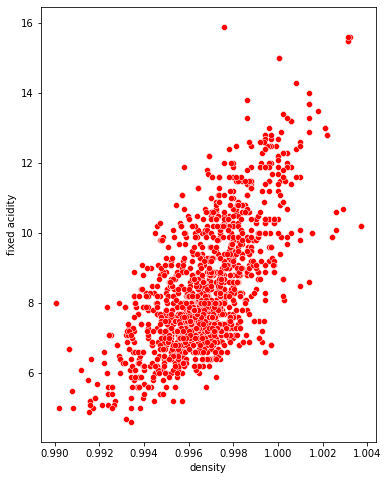

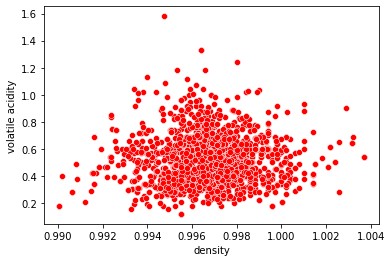

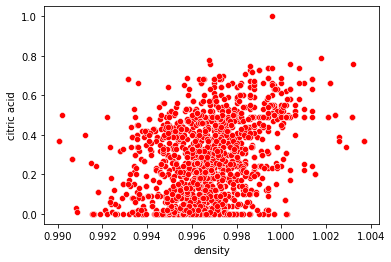

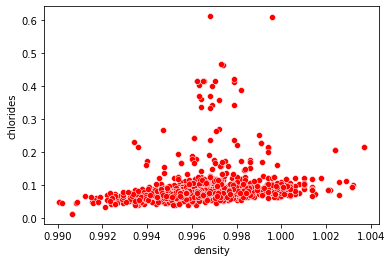

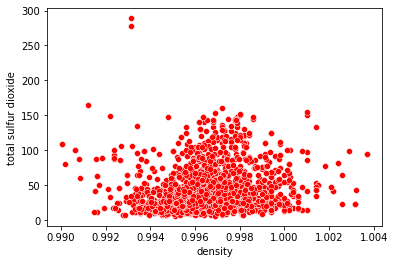

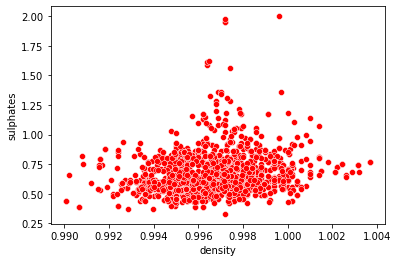

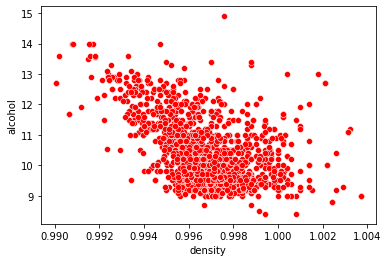

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[5]:
        sns.scatterplot(x = x.columns[5],y = i,data = x,color = 'Red')
        plt.show()

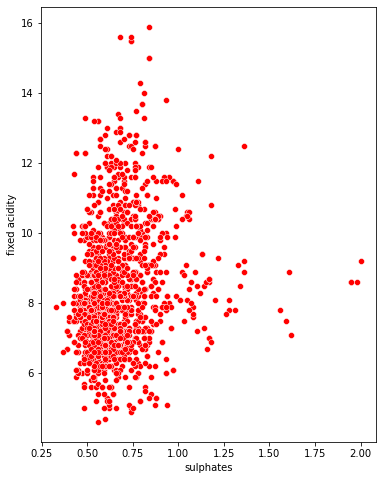

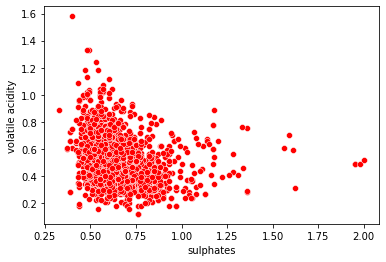

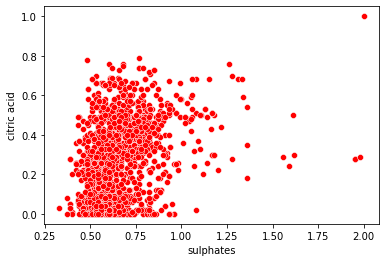

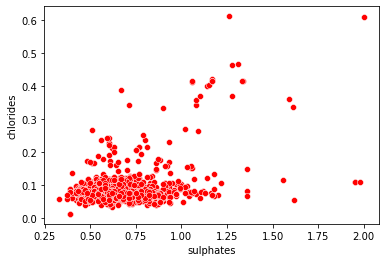

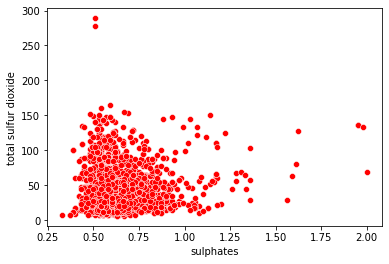

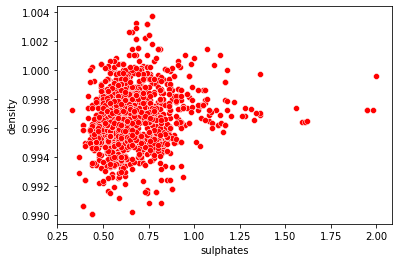

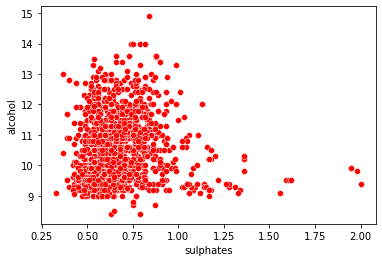

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[6]:
        sns.scatterplot(x = x.columns[6],y = i,data = x,color = 'Red')
        plt.show()

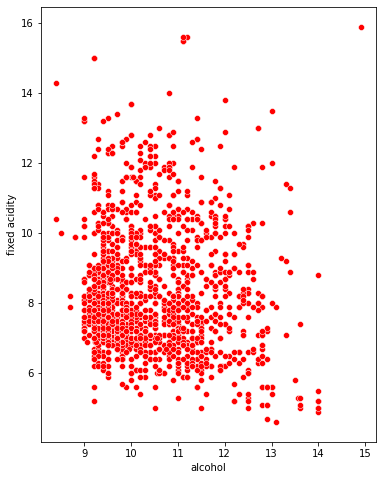

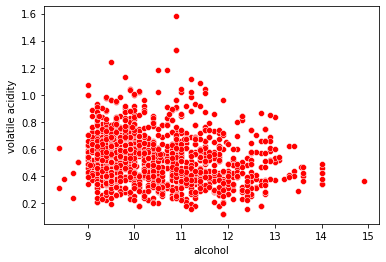

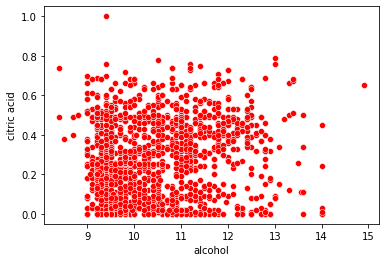

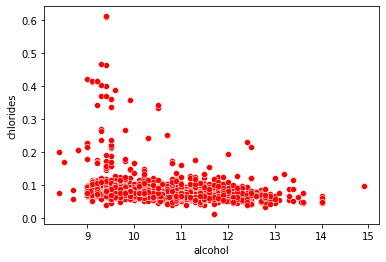

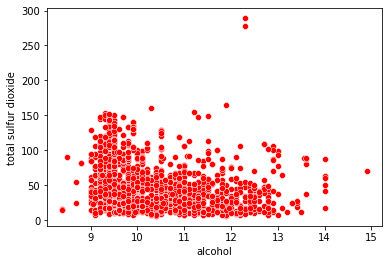

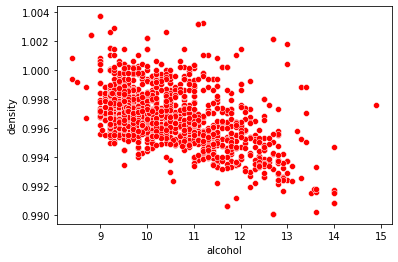

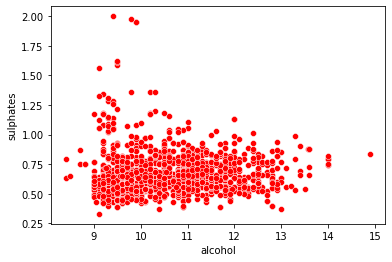

In [ ]:
plt.figure(figsize=(6,8))
x = data.drop('quality',axis = 1)
for i in x.columns:
    if i not in x.columns[7]:
        sns.scatterplot(x = x.columns[7],y = i,data = x,color = 'Red')
        plt.show()

In [ ]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [ ]:
label_quality = LabelEncoder()

In [ ]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [ ]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


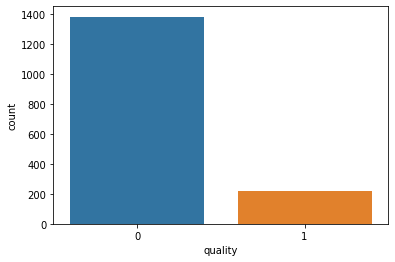

In [ ]:
sns.countplot(data['quality'])

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
Y = data.quality.values.reshape(-1,1)
X = data.drop(['quality'],axis = 1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1279, 8)
Shape of X_test:  (320, 8)
Shape of Y_train:  (1279, 1)
Shape of Y_test:  (320, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Lr_score = lr.score(X_test, Y_test)
print("Accuracy on Linear Regression Model: ",Lr_score*100)

Accuracy on Linear Regression Model:  85.625


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
RandomForestClassifierScore = rfc.score(X_test, Y_test)
print("Accuracy on Random Forest Classifier Model:", RandomForestClassifierScore*100)

Accuracy on Random Forest Classifier Model: 90.625


K Neighbors Classifier 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(4)
knn.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
KNeighborsClassifierScore = knn.score(X_test, Y_test)
print("Accuracy on K Neighbors Classifier Model: ", KNeighborsClassifierScore)


Accuracy on K Neighbors Classifier Model:  0.8875


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
DecisionTreeClassifierScore = dtc.score(X_test, Y_test)
print("Accuracy on Decision Treee Classifier Model:", DecisionTreeClassifierScore)

Accuracy on Decision Treee Classifier Model: 0.871875


Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
GradientBoostingClassifierScore = gb.score(X_test, Y_test)
print("Accuracy on Gradient Boosting Classifier Model: ", GradientBoostingClassifierScore)

Accuracy on Gradient Boosting Classifier Model:  0.8625


XGB Classifier

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
XGBClassifierScore = xg.score(X_test, Y_test)
print("Accuracy Score on Gradient Boosting Classifier Model: ", XGBClassifierScore)

Accuracy Score on Gradient Boosting Classifier Model:  0.86875


In [ ]:
from sklearn import metrics
y_pred_lr = lr.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_lr))
y_pred_rfc = rfc.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_rfc))
y_pred_knn = knn.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_knn))
y_pred_dtc = dtc.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_dtc))
y_pred_gb = dtc.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_gb))
y_pred_xg = xg.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       273
           1       0.52      0.26      0.34        47

    accuracy                           0.86       320
   macro avg       0.70      0.61      0.63       320
weighted avg       0.83      0.86      0.83       320

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       273
           1       0.76      0.53      0.62        47

    accuracy                           0.91       320
   macro avg       0.84      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.79      0.32      0.45        47

    accuracy                           0.89       320
   macro avg       0.84      0.65      0.70       320
weighted avg       0.88      0.89      0.87       320

              preci

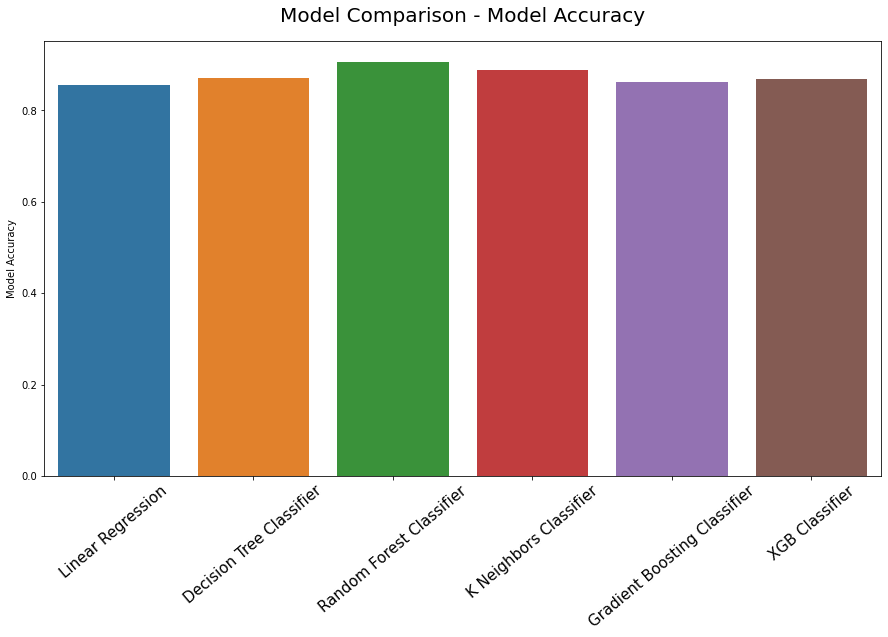

In [ ]:
x = ["Linear Regression", 
     "Decision Tree Classifier", 
     "Random Forest Classifier", 
     "K Neighbors Classifier",  
     "Gradient Boosting Classifier",
     "XGB Classifier"]

y = [Lr_score, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore,  
     GradientBoostingClassifierScore, 
     XGBClassifierScore]

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x=x,y=y);
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40, fontsize=15)
plt.title("Model Comparison - Model Accuracy", fontsize=20, y=1.03);